In [337]:
import sys
import os
import random
import statistics
import math
import matplotlib.pyplot as plt
import numpy as np


In [309]:
def readPd ( file ):
    '''
    Read Pd from data file with the following structure:
    head data.txt
    
    #Variant	Cit_Transport	DMS_score	Pd	AlphaMissense
    1	Yes	-0.62	0.644	0.152
    2	Yes	0.64	0.000	0.153
    3	No	-0.93	0.995	0.916
    4	No	-1.11	0.999	0.912
    '''
    with open(file, "r") as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s = {}
    for i in range(len(t)):
        if t[i]:
            if '#' not in str(t[i].split()[0]): 
                s[int(t[i].split()[0])] = (str(t[i].split()[1]), float(t[i].split()[3])) 
    return s

In [311]:
def readPn ( file ):
    '''
    Read Pd from data file with the following structure:
    head data.txt
    
    #Variant	Cit_Transport	DMS_score	Pd	AlphaMissense
    1	Yes	-0.62	0.644	0.152
    2	Yes	0.64	0.000	0.153
    3	No	-0.93	0.995	0.916
    4	No	-1.11	0.999	0.912
    '''
    with open(file, "r") as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s = {}
    for i in range(len(t)):
        if t[i]:
            if '#' not in str(t[i].split()[0]): 
                s[int(t[i].split()[0])] = (str(t[i].split()[1]), 1-float(t[i].split()[3])) 
    return s

In [313]:
pd = readPd ( 'data.txt' )
pn = readPn ( 'data.txt' )

In [315]:
def getRatesDelSample ( scores, cutoff ):
    '''
    Assumes scores is a dictionary with the following structure:
     1: ('Yes', 0.152),
     2: ('Yes', 0.153),
     3: ('No', 0.916),
     4: ('No', 0.912),
     5: ('Yes', 0.124),
 ...
    And assumes scores >= cutoff are TPs. 
    '''
    TP = 0.0 # Del variant (No) classified as deleterious (>= cutoff)
    TN = 0.0 # Neu variant (Yes) classified as neutral/beneficial (< cutoff)
    FP = 0.0 # Neu variant (Yes) classified as deleterious (>= cutoff) 
    FN = 0.0 # Del variant (No) classified as neutral/beneficial (< cutoff)

    FDR = []
    for k in range(1,11):
        t = list(range(1,39))
        v = random.choices(t, k=38)
        for i in v: #range(1,39):
            if scores[i][0] == 'Yes' and scores[i][1] >= cutoff:
                FP += 1
            elif scores[i][0] == 'Yes' and scores[i][1] < cutoff:
                TN += 1
            elif scores[i][0] == 'No' and scores[i][1] >= cutoff:
                TP += 1
            elif scores[i][0] == 'No' and scores[i][1] < cutoff:
                FN += 1
        #FPR = FP / ( FP + TN )
        FDR.append(FP / ( FP + TP ))
        #TPR = TP / ( TP + FN )
        #TNR = TN / ( TN + FP )
    return statistics.mean(FDR), statistics.stdev(FDR)/math.sqrt(10)

In [317]:
def getRatesNeuSample ( scores, cutoff ):
    '''
    Assumes scores is a dictionary with the following structure:
     1: ('Yes', 0.152),
     2: ('Yes', 0.153),
     3: ('No', 0.916),
     4: ('No', 0.912),
     5: ('Yes', 0.124),
 ...
    And assumes scores >= cutoff are TPs. 
    '''
    TP = 0.0 # Neu variant (Yes) classified as deleterious (>= cutoff) 
    FN = 0.0 # Neu variant (Yes) classified as neutral/beneficial (< cutoff)
    FP = 0.0 # Del variant (No) classified as deleterious (>= cutoff)
    TN = 0.0 # Del variant (No) classified as neutral/beneficial (< cutoff)

    FDR = []
    for k in range(1,11):
        t = list(range(1,39))
        v = random.choices(t, k=38)
        for i in v: #range(1,39):
            if scores[i][0] == 'Yes' and scores[i][1] >= cutoff:
                TP += 1
            elif scores[i][0] == 'Yes' and scores[i][1] < cutoff:
                FN += 1
            elif scores[i][0] == 'No' and scores[i][1] >= cutoff:
                FP += 1
            elif scores[i][0] == 'No' and scores[i][1] < cutoff:
                TN += 1
        #FPR = FP / ( FP + TN )
        FDR.append(FP / ( FP + TP ))
        #TPR = TP / ( TP + FN )
        #TNR = TN / ( TN + FP )
    
    return statistics.mean(FDR), statistics.stdev(FDR)/math.sqrt(10)

## Plotting false discovery rate as a function of $P_d$

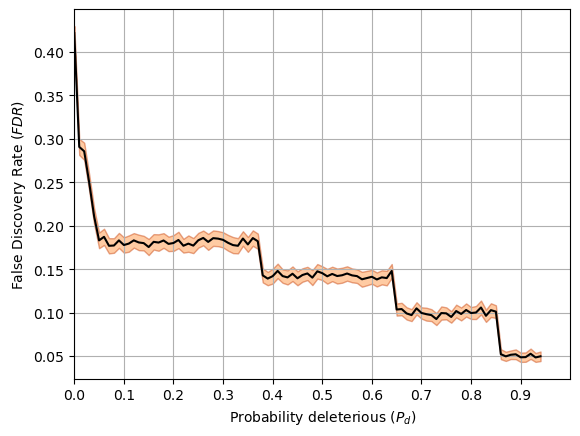

In [339]:
x = []
y = []
ey = []
r = list(range(0, 95))
for i in r:
    valmn = [] #0.0
    valse = []
    count = 0.0
    for j in range(0,100):
        FDRmn, FDRse = getRatesDelSample ( pd, r[i]/100)
        valmn.append(FDRmn)
        valse.append(FDRse)
    x.append(r[i]/100)
    y.append(statistics.mean(valmn))
    ey.append(statistics.mean(valse))
    
x = np.array(x)
y = np.array(y)
ey = np.array(ey)

plt.plot(x,y, 'k-')
plt.xlim(0,1.0)
plt.fill_between(x, y-ey, y+ey, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')
plt.xlabel('Probability deleterious ($P_d$)')
plt.ylabel('False Discovery Rate ($FDR$)')
plt.xticks(np.arange(0, 1.0, 0.1)) 
plt.grid()

## Plotting false discovery rate as a function of $P_n$

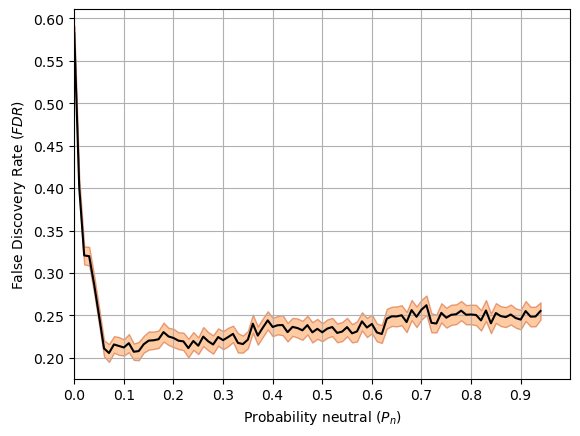

In [341]:
w = []
z = []
e = []
r = list(range(0, 95))
for i in r:
    valmn = [] #0.0
    valse = []
    count = 0.0
    for j in range(0,100):
        FDRmn, FDRse = getRatesNeuSample ( pn, r[i]/100)
        valmn.append(FDRmn)
        valse.append(FDRse)
    w.append(r[i]/100)
    z.append(statistics.mean(valmn))
    e.append(statistics.mean(valse))

w = np.array(w)
z = np.array(z)
e = np.array(e)

plt.plot(w,z, 'k-')
plt.xlim(0,1.0)
plt.fill_between(w, z-e, z+e, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.xlabel('Probability neutral ($P_n$)')
plt.ylabel('False Discovery Rate ($FDR$)')
plt.xticks(np.arange(0, 1.0, 0.1)) 
plt.grid()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


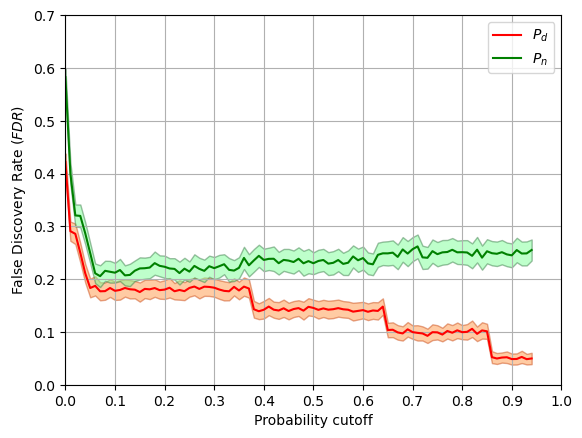

In [365]:
## Plotting together:
plt.plot(x,y, 'r-', label='$P_d$')
plt.xlim(0,1.0)
plt.ylim(0,0.7)
plt.fill_between(x, y-1.96*ey, y+1.96*ey, alpha=0.5, edgecolor='#CC4F1B', facecolor='#FF9848')

plt.plot(w,z, 'g-', label='$P_n$')
plt.xlim(0,1.0)
plt.ylim(0,0.7)
plt.fill_between(w, z-1.96*e, z+1.96*e, alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')

plt.xlabel('Probability cutoff')
plt.ylabel('False Discovery Rate ($FDR$)')
plt.xticks(np.arange(0, 1.01, 0.1)) 
plt.yticks(np.arange(0, 0.71, 0.1)) 
plt.legend(loc="upper right")

plt.grid()
#plt.savefig('foo.png')
#plt.savefig('foo.pdf')
plt.savefig('FDRs.ps') #, format='ps',dpi=1200, bbox_inches="tight", transparent=True)
#plt.savefig('FDRs.pdf', format='pdf',dpi=1200, bbox_inches="tight", transparent=True)
plt.savefig('FDRs.png', format='png',dpi=1200, bbox_inches="tight", transparent=True)


Figure SX. Estimation of false discovery rates at all possible deleterious and neutral probabilities. False discovery rates (FDR) were estimated using the citrate transport data of the 38 experimentally validated variants for both the deleterious (Pd) and neutral (Pn) probabilities. FDR confidence intervals (CIs) were estimated using the bootstrap and k=10 replicate samples, n=100 times. Plot shows the 95% CIs.  

In [361]:
print('Pd > 0.5 FDR, CIs: ', y[50], '(', y[50]-1.96*ey[50], y[50]+1.96*ey[50], ')')
print('Pn > 0.5 FDR, CIs: ', z[50], '(', z[50]-1.96*e[50], z[50]+1.96*e[50], ')')
print('Pn > 0.63 FDR, CIs: ', z[63], '(', z[63]-1.96*e[63], z[63]+1.96*e[63], ')')
print('Pd > 0.95 FDR, CIs: ', y[94], '(', y[94]-1.96*ey[94], y[94]+1.96*ey[94], ')')


Pd > 0.5 FDR, CIs:  0.14543632934413234 ( 0.1298969829515348 0.16097567573672988 )
Pn > 0.5 FDR, CIs:  0.23006168168869015 ( 0.20940277930490406 0.2507205840724762 )
Pn > 0.63 FDR, CIs:  0.24602673382618329 ( 0.22317089323438152 0.2688825744179851 )
Pd > 0.95 FDR, CIs:  0.049721002305606964 ( 0.03896187622356742 0.060480128387646506 )


In [329]:
def readStopScores ( ifile ) :
    '''
    '''
    with open ( ifile, 'r') as f:
        o = f.read()
        f.close()
    t = o.split('\n')

    s ={}
    for i in range(len(t)):
        if t[i]:
            r = t[i].split('\t')
            s[r[0]] = float(r[6])
    return s

mean:  0.9576935 ( 0.9466500909526913 0.9687369090473087 )


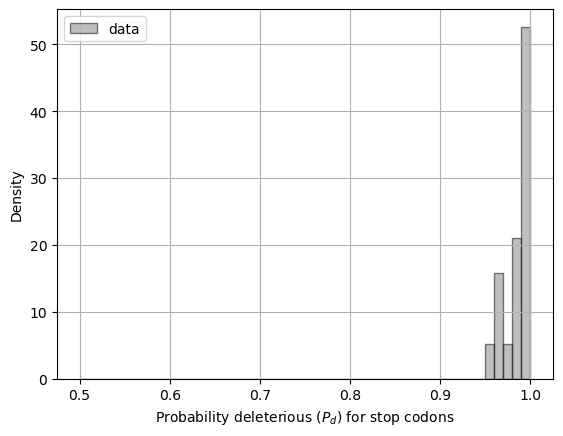

In [335]:
scores = './prob_Xs.txt'    
s1 = readStopScores ( scores )

data = list(s1.values())
for i in range(len(data)):
    data[i] = data[i]

m = statistics.mean(data)
s = statistics.stdev(data)
print( 'mean: ', m, '(', m-1.96*s/math.sqrt(519), m+1.96*s/math.sqrt(519), ')' )


y,x,_=hist(data,50,alpha=.5,label='data', color = "grey", edgecolor='black',lw=1, range=[0.5,1.0], density=True)
plt.xlabel('Probability deleterious ($P_d$) for stop codons')
plt.ylabel('Density')
plt.grid()
legend()
plt.show()

In [363]:
!pwd

/Users/eferrada/Desktop/SLC13A5/NOTEBOOK/DATA/ROC_RATEs
